In [12]:
import sys
sys.path.append('..\\src')
sys.path.append('..\\..\\DCE-DSC-MRI_CodeCollection\\src')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Classic Parker AIF')

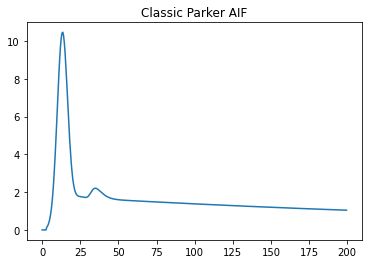

In [116]:
from dce import aifs

dt = 0.5
aif = aifs.parker(hct=0.42, t_start=3.)
t = np.arange(0,400)*dt #+ dt/2

c_ap = aif.c_ap(t)
plt.plot(t, c_ap)
plt.title('Classic Parker AIF')

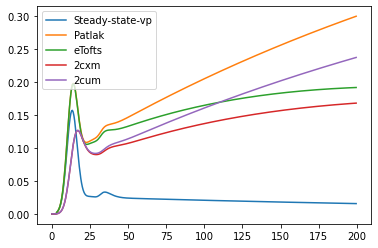

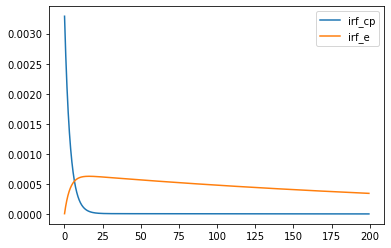

In [126]:
from dce import pk_models

pk_pars = {'vp': 0.015, 'ps': 5e-2, 've': 0.2, 'fp': 20, 'ktrans': 5e-2}
dt_interp_request = 0.1

steady_state_vp = pk_models.steady_state_vp(t, dt_interp_request, aif)
patlak = pk_models.patlak(t, dt_interp_request, aif)
etofts = pk_models.extended_tofts(t, dt_interp_request, aif)
tcxm = pk_models.tcxm(t, dt_interp_request, aif)
tcum = pk_models.tcum(t, dt_interp_request, aif)
tofts = pk_models.tofts(t, dt_interp_request, aif)

c_t_steady_state_vp, _c_cp, _c_e = steady_state_vp.conc(**pk_pars)
c_t_patlak, _c_cp, _c_e = patlak.conc(**pk_pars)
c_t_etofts, _c_cp, _c_e = etofts.conc(**pk_pars)
c_t_tcxm, _c_cp, _c_e = tcxm.conc(**pk_pars)
c_t_tcum, _c_cp, _c_e = tcum.conc(**pk_pars)
c_t_tofts, _c_cp, _c_e = tofts.conc(**pk_pars)


fig, ax = plt.subplots()
ax.plot(t, c_t_steady_state_vp, '-', label='Steady-state-vp')
ax.plot(t, c_t_patlak, '-', label='Patlak')
ax.plot(t, c_t_etofts, '-', label='eTofts')
ax.plot(t, c_t_tcxm, '-', label='2cxm')
ax.plot(t, c_t_tcum, '-', label='2cum')
ax.legend();

irf_cp_tcxm, irf_e_tcxm = tcxm.irf(**pk_pars)

fig, ax = plt.subplots()
ax.plot(tcxm.t_interp, irf_cp_tcxm, label='irf_cp')
ax.plot(tcxm.t_interp, irf_e_tcxm, label='irf_e')
ax.legend();

### Compare to output from LEK's code (sanity check)

In [14]:
from original.LEK_UoEdinburghUK.PharmacokineticModelling.models import Patlak, Kety, ExtKety, TwoCUM, TwoCXM

Text(0.5, 1.0, '2CUM')

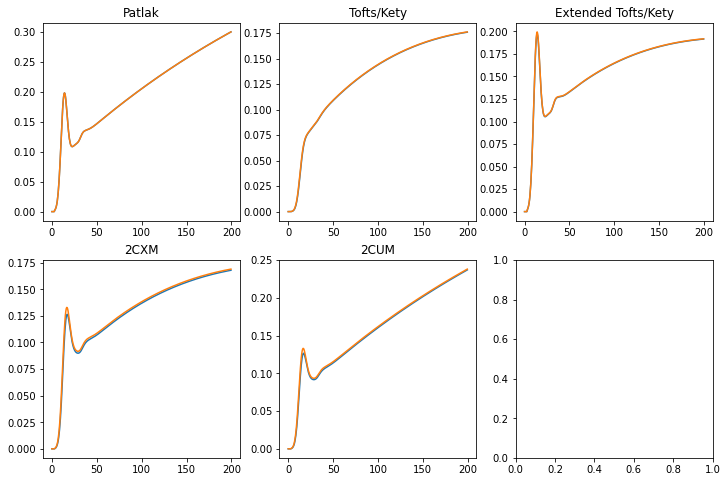

In [127]:
ef = pk_pars['ps'] / (pk_pars['ps'] + pk_pars['fp']/100.)
c_t_patlak_LEK = Patlak(np.array([pk_pars['ps']/60., pk_pars['vp']]), t, c_ap, toff=0.)
c_t_tofts_LEK = Kety(np.array([pk_pars['ktrans']/60., pk_pars['ve']]), t, c_ap, toff=0.)
c_t_etofts_LEK = ExtKety(np.array([pk_pars['ps']/60., pk_pars['ve'], pk_pars['vp']]), t, c_ap, toff=0.)
c_t_tcxm_LEK = TwoCXM(np.array([ef, pk_pars['fp']/(100.*60.), pk_pars['ve'], pk_pars['vp']]), t, c_ap, toff=0.)
c_t_tcum_LEK = TwoCUM(np.array([ef, pk_pars['fp']/(100.*60.), pk_pars['vp']]), t, c_ap, toff=0.)

fig, ax = plt.subplots(2,3, figsize=(12,8))
ax[0,0].plot(t, c_t_patlak, '-', t, c_t_patlak_LEK, '-')
ax[0,0].set_title('Patlak')
ax[0,1].plot(t, c_t_tofts, '-', t, c_t_tofts_LEK, '-')
ax[0,1].set_title('Tofts/Kety')
ax[0,2].plot(t, c_t_etofts, '-', t, c_t_etofts_LEK, '-')
ax[0,2].set_title('Extended Tofts/Kety')
ax[1,0].plot(t, c_t_tcxm, '-', t, c_t_tcxm_LEK, '-')
ax[1,0].set_title('2CXM')
ax[1,1].plot(t, c_t_tcum, '-', t, c_t_tcum_LEK, '-')
ax[1,1].set_title('2CUM')


Notes:
- LEK code requires t[0]=0 as t[1] is used as the time spacing for convolution integral
- Small discrpancies due to MJT code using continuous Parker AIF function, rather than discretised version. Results converge at high temporal resolution.
